Aluna: Renata Silva Pereira Balsani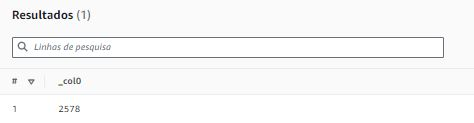

---



Exploração e análise de dados de crédito com SQL
Esse notebook faz parte do curso SQL para análise de dados da EBAC.

Os dados:
Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

idade = idade do cliente
sexo = sexo do cliente (F ou M)
dependentes = número de dependentes do cliente
escolaridade = nível de escolaridade do clientes
salario_anual = faixa salarial do cliente
tipo_cartao = tipo de cartao do cliente
qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
meses_inativo_12m = quantidade de meses que o cliente ficou inativo
limite_credito = limite de credito do cliente
valor_transacoes_12m = valor das transações dos ultimos 12 meses
qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses
A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

Análise de Dados:
A etapa inicial da análise consiste em compreender o conteúdo de nossa matéria-prima. Vamos realizar a exploração dos dados:

**Qual é a extensão de informações disponíveis em nossa base de dados?**

Query: SELECT count(*) FROM credito

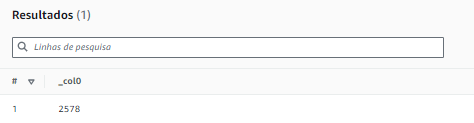

Nota: A base de dados vinculada acima possui mais linhas do que aquelas selecionadas. É possível utilizar todas as linhas ou optar por uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável será a análise. No entanto, é importante considerar limitações computacionais e financeiras, tornando a redução de dados para fins de estudo uma opção interessante.

Como se apresentam os dados?

SELECT * FROM credito8

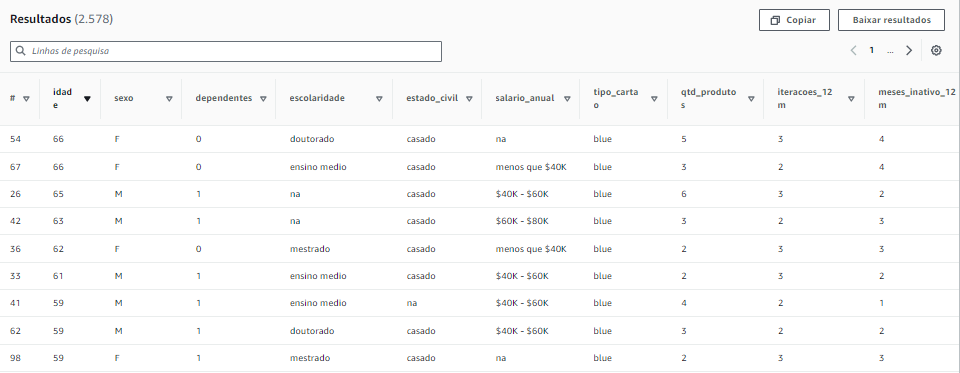

SELECT * FROM credito8 LIMIT 10

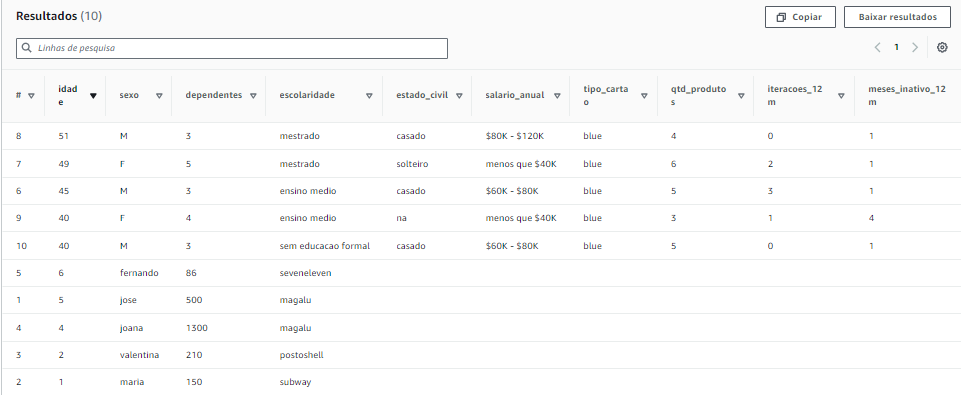

É possível reparar que existem algumas informações nulas na tabela (valor na). Vamos analisar os dados:

DESCRIBE credito8

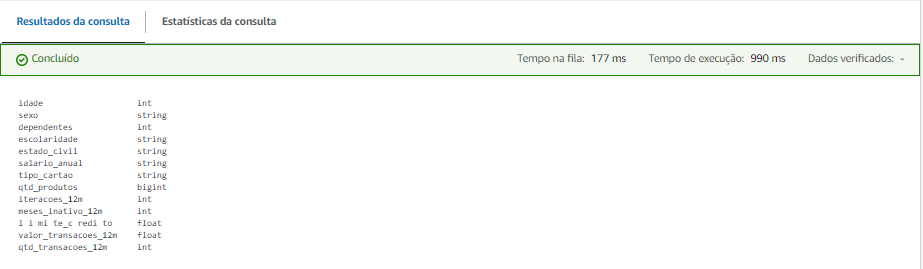

Agora que compreendemos os tipos de dados, concentraremos nossa atenção nas variáveis que não são numéricas.

Quais opções de escolaridade estão disponíveis no conjunto de dados?

Query: SELECT DISTINCT escolaridade FROM credito8

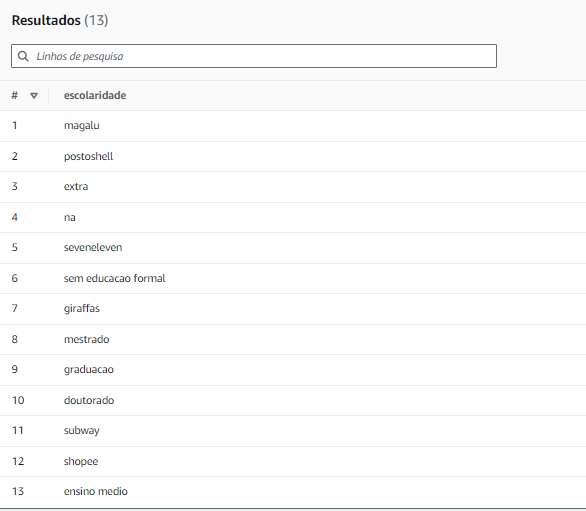

Novamente encontramos no dataset valores nulos nos dados de estado civil.

Query: SELECT DISTINCT salario_anual FROM credito8

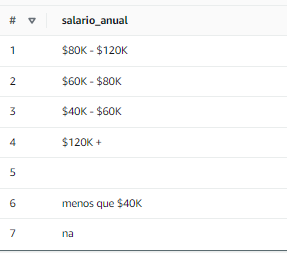

Os salários neste conjunto de dados não são apresentados com valores exatos dos ganhos dos clientes. Em vez disso, são fornecidas faixas salariais para cada indivíduo. Além disso, há presença de dados nulos.

Query: SELECT DISTINCT tipo_cartao FROM credito8

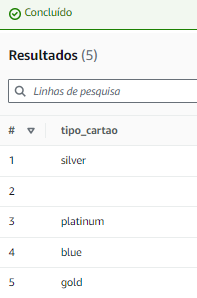

Análise de Dados

Após explorarmos os dados e termos uma compreensão das informações disponíveis em nosso banco de dados, podemos agora analisar essas informações para entender o panorama do banco de dados. Vamos formular perguntas: / No contexto deste banco de dados, qual é a distribuição do número de clientes em cada faixa salarial?

Query: select count(*), salario_anual from credito8 group by salario_anual

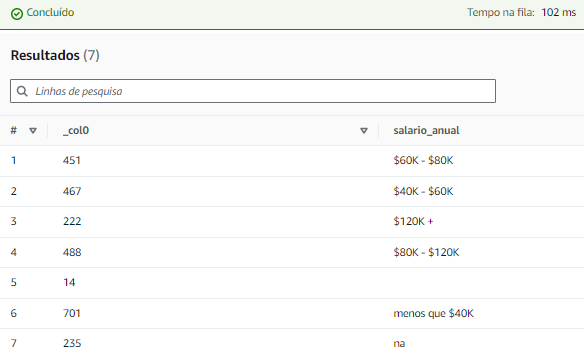

A predominância dos clientes nesta base de dados apresenta uma renda inferior a 40 mil, e há 235 clientes sem informações ou com a faixa salarial não especificada. Em certo sentido, pode ser vantajoso para a empresa concentrar esforços nesse segmento de renda mais baixa.








Nesse banco de dados, quantos clientes são homens e quantos são mulheres?

Query: select count(*), sexo from credito8 group by sexo

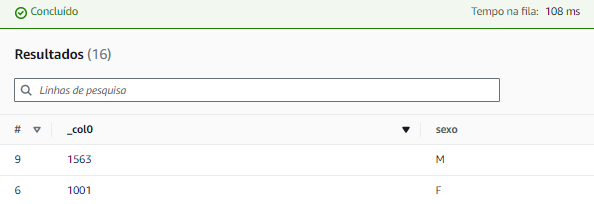

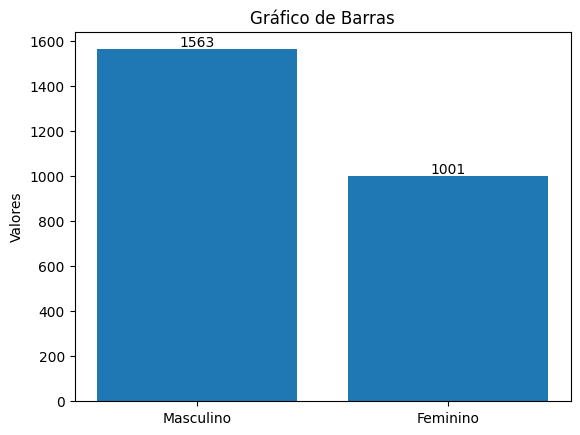

In [5]:
import matplotlib.pyplot as plt

# Dados fornecidos
dados1 = (1563, 'M', 6)
dados2 = (1001, 'F')

# Categorias
categorias = ['Masculino', 'Feminino']

# Criando um gráfico de barras
plt.bar(categorias, [dados1[0], dados2[0]])
plt.ylabel('Valores')
plt.title('Gráfico de Barras')

# Adicionando os valores no topo das barras
for i, valor in enumerate([dados1[0], dados2[0]]):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()


A predominância de clientes neste banco é masculina! A partir do arquivo CSV contendo os dados, podemos criar um gráfico de pizza para visualizar melhor a proporção entre masculino e feminino.

Com o objetivo de direcionar nossa estratégia de marketing de forma eficiente para nossos clientes, é relevante explorar também a faixa etária predominante. Qual é a faixa etária predominante dos clientes?







Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito8 group by sexo

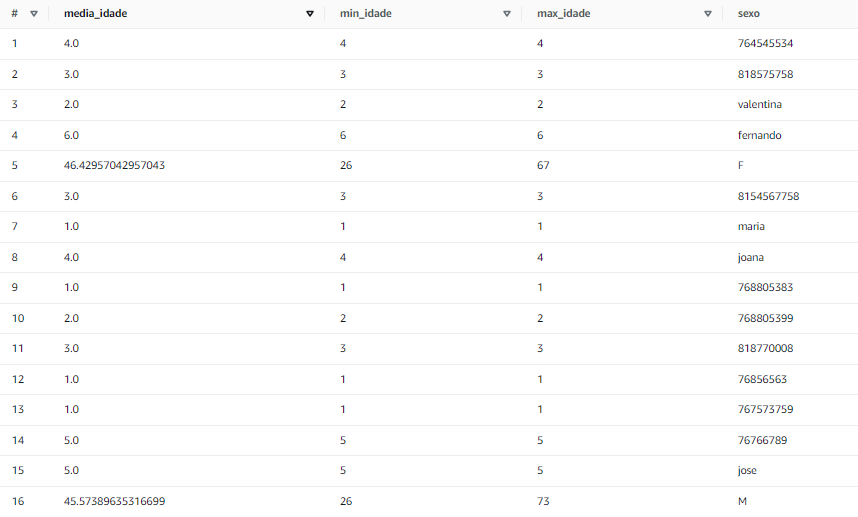

Não há informação relevante para essa análise.

Qual a maior e menor transação dos clientes?

Query: select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito8

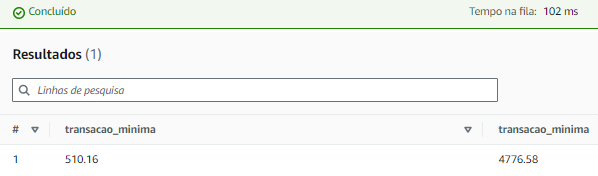

Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58

Quais as características dos clientes que possuem os maiores creditos?

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito8 where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

De quem é o maior gasto?

select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito8 group by sexo

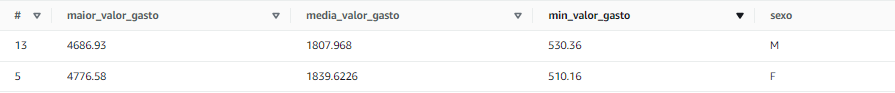

Conclusão
Essas foram algumas análises extraídas do dataset de crédito.

Alguns insights interessantes:

a maior parte dos clientes possui renda entre 40 mil a 60 mil

---


a maior parte dos clientes é masculino


---

os maiores gastos são dos homens